In [17]:
import geopandas as gpd
import pandas as pd
import numpy as np
import urllib
import requests
import os
import io
import json
import pylab as pl
import shapely
from fiona.crs import from_epsg
#from getCitiBikeCSV import getCitiBikeCSV # must have this function locally or in path
#from get_jsonparsed_data import get_jsonparsed_data # must have this function locally or in path
import scipy as sp
from scipy import stats
import pysal as ps
#sys.path.append("/home/cusp/fbianco/choroplethNYC/")
import choroplethNYC as cp
#from importlib import reload

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
os.environ["PUIDATA"] = "%s/PUIDATA"%os.getenv("HOME")

print("PUIDATA", os.getenv("PUIDATA"))

PUIDATA /nfshome/mv1742/PUIDATA


In [7]:
os.getenv("PUIDATA")

'/nfshome/mv1742/PUIDATA'

In [8]:
url = "https://data.cityofnewyork.us/api/views/i8iw-xf4u/files/YObIR0MbpUVA0EpQzZSq5x55FzKGM2ejSeahdvjqR20?filename=ZIP_CODE_040114.zip"
urllib.request.urlretrieve(url, "zip_codes.gz")

('zip_codes.gz', <http.client.HTTPMessage at 0x7f7a8cadbac8>)

In [9]:
!unzip -d $PUIDATA zip_codes.gz

Archive:  zip_codes.gz
  inflating: /nfshome/mv1742/PUIDATA/ZIP_CODE_040114.shx  
  inflating: /nfshome/mv1742/PUIDATA/ZIP_CODE_040114.dbf  
  inflating: /nfshome/mv1742/PUIDATA/ZIP_CODE_040114.prj  
  inflating: /nfshome/mv1742/PUIDATA/ZIP_CODE_040114.sbn  
  inflating: /nfshome/mv1742/PUIDATA/ZIP_CODE_040114.sbx  
  inflating: /nfshome/mv1742/PUIDATA/ZIP_CODE_040114.shp  
  inflating: /nfshome/mv1742/PUIDATA/ZIP_CODE_040114.shp.xml  


In [10]:
nyc_zipcodes = gpd.GeoDataFrame.from_file(os.getenv("PUIDATA") + "/" + 
                                     "ZIP_CODE_040114.shp")

In [11]:
nyc_zipcodes.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [12]:
nyc_zipcodes.dtypes

ZIPCODE        object
BLDGZIP        object
PO_NAME        object
POPULATION    float64
AREA          float64
STATE          object
COUNTY         object
ST_FIPS        object
CTY_FIPS       object
URL            object
SHAPE_AREA    float64
SHAPE_LEN     float64
geometry       object
dtype: object

In [13]:
nyc_zipcodes['ZIPCODE'] = nyc_zipcodes['ZIPCODE'].astype(int)

In [14]:
nyc_zipcodes.dtypes

ZIPCODE         int64
BLDGZIP        object
PO_NAME        object
POPULATION    float64
AREA          float64
STATE          object
COUNTY         object
ST_FIPS        object
CTY_FIPS       object
URL            object
SHAPE_AREA    float64
SHAPE_LEN     float64
geometry       object
dtype: object

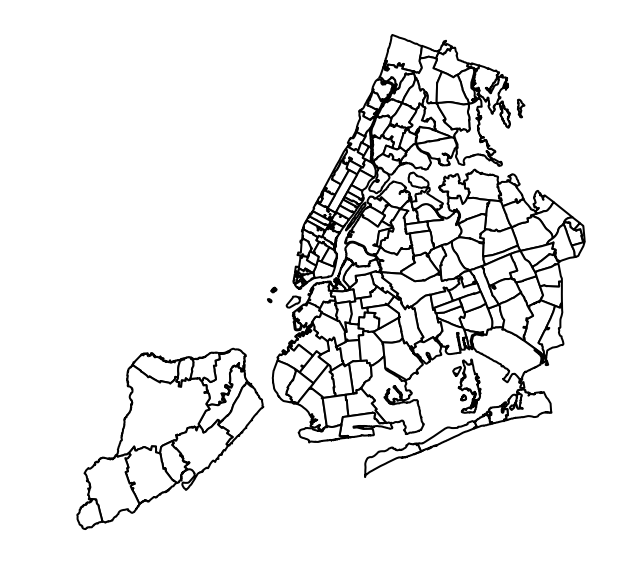

In [18]:
# using the built in plot function as pumashp.plot(pumashp....)
# using a choroplethNYC function that FBB wrote
cp.choroplethNYC(nyc_zipcodes, column=None, color="white", edgecolor="black", lw=2);

In [19]:
projects = pd.read_csv('https://data.cityofnewyork.us/api/views/h3qk-ybvt/rows.csv?accessType=DOWNLOAD')

In [20]:
projects.head()

,PrimaryProjectType,SubType,ProjectStatus,StartDateActual,FinishDateActual,ProjectSiteName,ProjectSiteAddress,Acronym,CO2e (MT) Calculated,Postcode,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,Lighting System Upgrade,Retrofit,Completed,30-Apr-10,30-Jun-10,Crossroads Juvenile Center,17 Bristol Street,ACS,86.05,11212.0,BROOKLYN,40.670746,-73.912932,16.0,41.0,924.0,3378202.0,3.034980e+09,Brownsville ...
1,HVAC System Upgrade,Retrofit,Completed,30-Apr-10,30-Jun-10,Horizon Juvenile Center - 560 Brook Avenue,55 St. Anns Ave (560 Brook),ACS,105.27,10454.0,BRONX,40.802554,-73.920557,1.0,8.0,19.0,NaN,NaN,Mott Haven-Port Morris ...
2,Comprehensive,Retrofit,Cancelled,NaN,NaN,Brooklyn Heights Branch Library,280 Cadman Plaza West,BPL,117.07,11201.0,BROOKLYN,40.695657,-73.991006,2.0,33.0,502.0,3001939.0,3.002390e+09,Brooklyn Heights-Cobble Hill ...
3,Energy Audit,None,Completed,16-Mar-10,23-Aug-10,Brooklyn Heights Branch Library,286 Fulton Street,BPL,135.53,11201.0,BROOKLYN,40.695520,-73.990963,2.0,33.0,502.0,3001939.0,3.002390e+09,Brooklyn Heights-Cobble Hill ...
4,Other,Retro-commissioning,Proposed,NaN,NaN,Brooklyn Heights Branch Library,280 Cadman Plaza West,BPL,NaN,11201.0,BROOKLYN,40.695657,-73.991006,2.0,33.0,502.0,3001939.0,3.002390e+09,Brooklyn Heights-Cobble Hill ...


In [21]:
projects.dropna(inplace=True)

In [22]:
projects['Postcode'] = projects['Postcode'].astype(int)

In [23]:
projects['ZIPCODE'] = projects['Postcode']

In [32]:
projects.head()

,PrimaryProjectType,SubType,ProjectStatus,StartDateActual,FinishDateActual,ProjectSiteName,ProjectSiteAddress,Acronym,CO2e (MT) Calculated,Postcode,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,ZIPCODE
0,Lighting System Upgrade,Retrofit,Completed,30-Apr-10,30-Jun-10,Crossroads Juvenile Center,17 Bristol Street,ACS,86.05,11212,BROOKLYN,40.670746,-73.912932,16.0,41.0,924.0,3378202.0,3.034980e+09,Brownsville ...,11212
3,Energy Audit,None,Completed,16-Mar-10,23-Aug-10,Brooklyn Heights Branch Library,286 Fulton Street,BPL,135.53,11201,BROOKLYN,40.695520,-73.990963,2.0,33.0,502.0,3001939.0,3.002390e+09,Brooklyn Heights-Cobble Hill ...,11201
8,Lighting System Upgrade,Retrofit,Completed,9-Apr-12,28-Sep-12,Leonard Branch Library,81 Devoe Street,BPL,15.10,11211,BROOKLYN,40.713456,-73.947916,1.0,34.0,503.0,3068818.0,3.027620e+09,East Williamsburg ...,11211
9,Lighting System Upgrade,Retrofit,Install,14-May-12,28-Sep-12,Washington Irving Branch Library,360 Irving Avenue,BPL,11.90,11237,BROOKLYN,40.697745,-73.912157,4.0,37.0,435.0,3076852.0,3.033620e+09,Bushwick North ...,11237
19,Lighting System Upgrade,Retrofit,Completed,1-Mar-11,9-Aug-11,137 Centre Street,133-37 Centre Street,DCAS,71.03,10013,MANHATTAN,40.717036,-74.000747,1.0,1.0,31.0,1002358.0,1.001970e+09,SoHo-TriBeCa-Civic Center-Little Italy ...,10013


In [33]:
nyc_zipcodes.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [34]:
projects.head()

,PrimaryProjectType,SubType,ProjectStatus,StartDateActual,FinishDateActual,ProjectSiteName,ProjectSiteAddress,Acronym,CO2e (MT) Calculated,Postcode,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,ZIPCODE
0,Lighting System Upgrade,Retrofit,Completed,30-Apr-10,30-Jun-10,Crossroads Juvenile Center,17 Bristol Street,ACS,86.05,11212,BROOKLYN,40.670746,-73.912932,16.0,41.0,924.0,3378202.0,3.034980e+09,Brownsville ...,11212
3,Energy Audit,None,Completed,16-Mar-10,23-Aug-10,Brooklyn Heights Branch Library,286 Fulton Street,BPL,135.53,11201,BROOKLYN,40.695520,-73.990963,2.0,33.0,502.0,3001939.0,3.002390e+09,Brooklyn Heights-Cobble Hill ...,11201
8,Lighting System Upgrade,Retrofit,Completed,9-Apr-12,28-Sep-12,Leonard Branch Library,81 Devoe Street,BPL,15.10,11211,BROOKLYN,40.713456,-73.947916,1.0,34.0,503.0,3068818.0,3.027620e+09,East Williamsburg ...,11211
9,Lighting System Upgrade,Retrofit,Install,14-May-12,28-Sep-12,Washington Irving Branch Library,360 Irving Avenue,BPL,11.90,11237,BROOKLYN,40.697745,-73.912157,4.0,37.0,435.0,3076852.0,3.033620e+09,Bushwick North ...,11237
19,Lighting System Upgrade,Retrofit,Completed,1-Mar-11,9-Aug-11,137 Centre Street,133-37 Centre Street,DCAS,71.03,10013,MANHATTAN,40.717036,-74.000747,1.0,1.0,31.0,1002358.0,1.001970e+09,SoHo-TriBeCa-Civic Center-Little Italy ...,10013


In [35]:
grouped_projects = projects.groupby('ZIPCODE').count().reset_index()

grouped_projects.head()

,ZIPCODE,PrimaryProjectType,SubType,ProjectStatus,StartDateActual,FinishDateActual,ProjectSiteName,ProjectSiteAddress,Acronym,CO2e (MT) Calculated,Postcode,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,10001,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
1,10002,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,10003,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,10004,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,10007,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [36]:
type(nyc_zipcodes.head())

geopandas.geodataframe.GeoDataFrame

In [38]:
zip_merged = nyc_zipcodes.merge(grouped_projects, on='ZIPCODE')

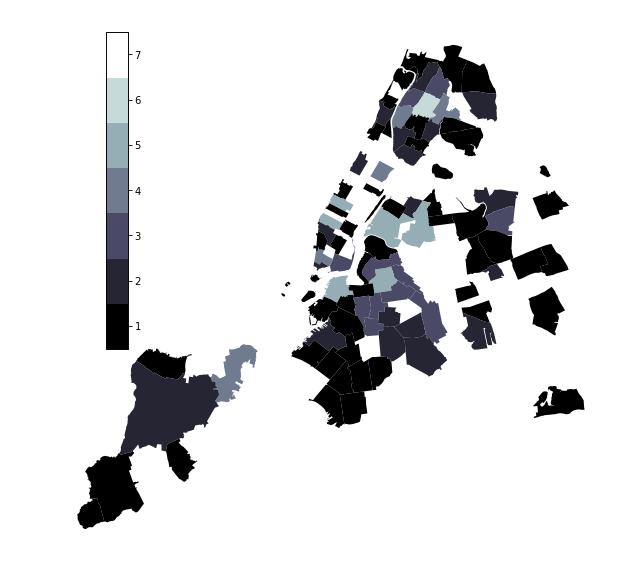

In [39]:
ax = pl.figure(figsize=(10,10)).add_subplot(111)
cp.choroplethNYC(zip_merged,
                 column='CO2e (MT) Calculated', ax=ax, kind="discrete", k=2, #scheme='equal_interval', k=4,
                                   #legend=True, 
                 cmap="bone");


In [40]:
# Figure 1. Chloropleth

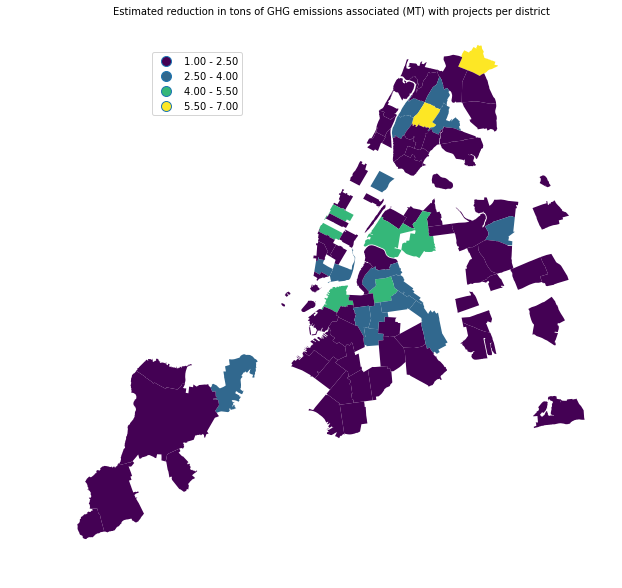

In [43]:
cp.choroplethNYC(zip_merged,
                 column="CO2e (MT) Calculated", scheme='equal_interval', k=4,
                                   #legend=True, 
                 cmap="viridis");
plt.title("Estimated reduction in tons of GHG emissions associated (MT) with projects per district", fontsize=10);
plt.savefig('GHG emissions reduced nyc.png')

Note: data updated as of Nov 2, 2018 <br />
Source: https://data.cityofnewyork.us/Environment/Energy-Efficiency-Projects/h3qk-ybvt


## Figure 1: Estimated reduction in tons of GHG emissions associated (MT) with projects per district

The City’s Long-Term Sustainability Plan, PlaNYC, calls for City government to reduce greenhouse gas emissions produced by municipal operations 30% by 2017. A large part of this effort is retrofitting municipal buildings to become more energy efficient. This dataset lists energy efficiency projects at City buildings that are complete or in progress. Projects are listed by address, building name, and agency, and the dataset includes the estimated reduction in tons of GHG emissions associated with the project.

Figure 1 presented above shows the estimated reduction in tons of GHG emissions associated (MT) per district.